In [1]:
def align_and_merge_dataframes(df_dict, fill_method='bfill'):
    """
    Aligns and merges multiple daily DataFrames into a single DataFrame without NaN values.
    Replace NaN with next/previous value in the beginning/end 

    Parameters:
    - df_dict (dict): A dictionary where keys are the desired column names in the merged DataFrame,
                      and values are pandas DataFrames with a DateTimeIndex.
    - fill_method (str): Method to fill NaN values. Options include 'bfill', 'ffill', 'interpolate'.

    Returns:
    - pd.DataFrame: The merged DataFrame containing all aligned data without NaN values.
    """
    if not df_dict:
        raise ValueError("The input dictionary of DataFrames is empty.")

    # Ensure all DataFrames have a DateTimeIndex
    for name, df in df_dict.items():
        if not isinstance(df.index, pd.DatetimeIndex):
            raise TypeError(f"The DataFrame for '{name}' does not have a DateTimeIndex.")

    # 1. Determine Global Start and End Dates
    start_date = min(df.index.min() for df in df_dict.values())
    end_date = max(df.index.max() for df in df_dict.values())

    # 2. Create Master Daily Date Range
    master_freq = 'D'
    master_dates = pd.date_range(start=start_date, end=end_date, freq=master_freq)

    # 3. Reindex and Fill Each DataFrame
    filled_dfs = {}
    for name, df in df_dict.items():
        # Reindex to master_dates
        reindexed_df = df.reindex(master_dates)

        # Fill NaNs based on the specified method
        if fill_method == 'bfill':
            filled_df = reindexed_df.bfill()
        elif fill_method == 'ffill':
            filled_df = reindexed_df.ffill()
        elif fill_method == 'interpolate':
            filled_df = reindexed_df.interpolate(method='linear')
        else:
            raise ValueError("fill_method must be 'bfill', 'ffill', or 'interpolate'")

        # After filling, handle remaining NaNs (if any)
        filled_df = filled_df.fillna(method='ffill').fillna(method='bfill')

        filled_dfs[name] = filled_df

    # 4. Merge All DataFrames
    merged_df = pd.concat(filled_dfs.values(), axis=1)
    merged_df.columns = filled_dfs.keys()

    # 5. Verify No NaN Values
    nan_counts = merged_df.isnull().sum()
    if nan_counts.sum() == 0:
        print("Merged DataFrame:")
        print(merged_df)
        print("\nMerged DataFrame successfully created with no NaN values.")
    else:
        print("There are still NaN values in the merged DataFrame:")
        print(merged_df[merged_df.isnull().any(axis=1)])

    return merged_df

In [8]:
import pandas as pd
import numpy as np

def align_and_merge_dataframes(df_dict, fill_method='ffill'):
    """
    Aligns and merges multiple daily DataFrames into a single DataFrame without NaN values.

    Parameters:
    - df_dict (dict): A dictionary where keys are the desired column names in the merged DataFrame,
                      and values are pandas DataFrames with a DateTimeIndex.
    - fill_method (str): Primary method to fill NaN values. Options include 'ffill', 'bfill', 'interpolate'.

    Returns:
    - pd.DataFrame: The merged DataFrame containing all aligned data without NaN values.
    """
    if not df_dict:
        raise ValueError("The input dictionary of DataFrames is empty.")

    # Ensure all DataFrames have a DateTimeIndex
    for name, df in df_dict.items():
        if not isinstance(df.index, pd.DatetimeIndex):
            raise TypeError(f"The DataFrame for '{name}' does not have a DateTimeIndex.")

    # 1. Determine Global Start and End Dates
    start_date = min(df.index.min() for df in df_dict.values())
    end_date = max(df.index.max() for df in df_dict.values())

    # 2. Create Master Daily Date Range
    master_freq = 'D'
    master_dates = pd.date_range(start=start_date, end=end_date, freq=master_freq)

    # 3. Reindex and Fill Each DataFrame
    filled_dfs = {}
    for name, df in df_dict.items():
        # Reindex to master_dates
        reindexed_df = df.reindex(master_dates)

        # Fill NaNs based on the specified method
        if fill_method == 'ffill':
            filled_df = reindexed_df.ffill()
        elif fill_method == 'bfill':
            filled_df = reindexed_df.bfill()
        elif fill_method == 'interpolate':
            filled_df = reindexed_df.interpolate(method='linear')
        else:
            raise ValueError("fill_method must be 'ffill', 'bfill', or 'interpolate'")

        # Apply both ffill and bfill to ensure all NaNs are filled
        filled_df = filled_df.ffill().bfill()

        filled_dfs[name] = filled_df

    # 4. Merge All DataFrames
    merged_df = pd.concat(filled_dfs.values(), axis=1)
    merged_df.columns = filled_dfs.keys()

    # 5. Verify No NaN Values
    if merged_df.isnull().values.any():
        print("There are still NaN values in the merged DataFrame:")
        print(merged_df[merged_df.isnull().any(axis=1)])
    else:
        print("Merged DataFrame:")
        print(merged_df)
        print("\nMerged DataFrame successfully created with no NaN values.")

    return merged_df

# Example Usage
if __name__ == "__main__":
    # 1. Create Sample Daily DataFrames with Different DateTimeIndices

    # a. Sales DataFrame with missing dates (e.g., '2023-01-03' and '2023-01-06' have NaNs)
    dates_sales = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')
    sales_values = [500, 600, np.nan, 700, 800, np.nan, 900, 1000, 1100, 1200]
    df_sales = pd.DataFrame({'sales': sales_values}, index=dates_sales)

    # b. Temperature DataFrame with missing dates (e.g., '2023-01-05' and '2023-01-08' have NaNs)
    dates_temp = pd.date_range(start='2023-01-02', end='2023-01-09', freq='D')
    temperature_values = [22, 23, 24, np.nan, 26, 27, np.nan, 30]
    df_temperature = pd.DataFrame({'temperature': temperature_values}, index=dates_temp)

    # c. Humidity DataFrame with missing dates (e.g., '2023-01-04' and '2023-01-07' have NaNs)
    dates_humidity = pd.date_range(start='2023-01-01', end='2023-01-07', freq='D')
    humidity_values = [80, 82, 83, np.nan, 85, np.nan, 87]
    df_humidity = pd.DataFrame({'humidity': humidity_values}, index=dates_humidity)

    # 2. Create a dictionary of DataFrames
    dfs = {
        'sales': df_sales,
        'temperature': df_temperature,
        'humidity': df_humidity
    }

    # 3. Call the function to merge and fill NaNs
    merged_df = align_and_merge_dataframes(dfs, fill_method='ffill')


Merged DataFrame:
             sales  temperature  humidity
2023-01-01   500.0         22.0      80.0
2023-01-02   600.0         22.0      82.0
2023-01-03   600.0         23.0      83.0
2023-01-04   700.0         24.0      83.0
2023-01-05   800.0         24.0      85.0
2023-01-06   800.0         26.0      85.0
2023-01-07   900.0         27.0      87.0
2023-01-08  1000.0         27.0      87.0
2023-01-09  1100.0         30.0      87.0
2023-01-10  1200.0         30.0      87.0

Merged DataFrame successfully created with no NaN values.


In [9]:
dates_sales

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')

In [10]:
dates_temps

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09'],
              dtype='datetime64[ns]', freq='D')

In [11]:
dates_humidity 

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df_temperature

,temperature
2023-01-02,22.0
2023-01-03,23.0
2023-01-04,24.0
2023-01-05,NaN
2023-01-06,26.0
2023-01-07,27.0
2023-01-08,NaN
2023-01-09,30.0


In [31]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Create a date range with daily frequency for 30 days
date_range = pd.date_range(start='2023-01-01', periods=30, freq='D')

# Simulate daily returns as percentages
returns = np.random.normal(loc=0.001, scale=0.02, size=len(date_range))  # Mean 0.1%, SD 2%

# Simulate regimes: Let's assume three regimes 'A', 'B', 'C' switching every 10 days
regimes = ['A'] * 10 + ['B'] * 10 + ['C'] * 10

# Create the DataFrame
df = pd.DataFrame({
    'timestamp': date_range,
    'returns': returns,
    'regime': regimes
}).set_index('timestamp')

print(df.head())


             returns regime
timestamp                  
2023-01-01  0.010934      A
2023-01-02 -0.001765      A
2023-01-03  0.013954      A
2023-01-04  0.031461      A
2023-01-05 -0.003683      A


Index Name: timestamp


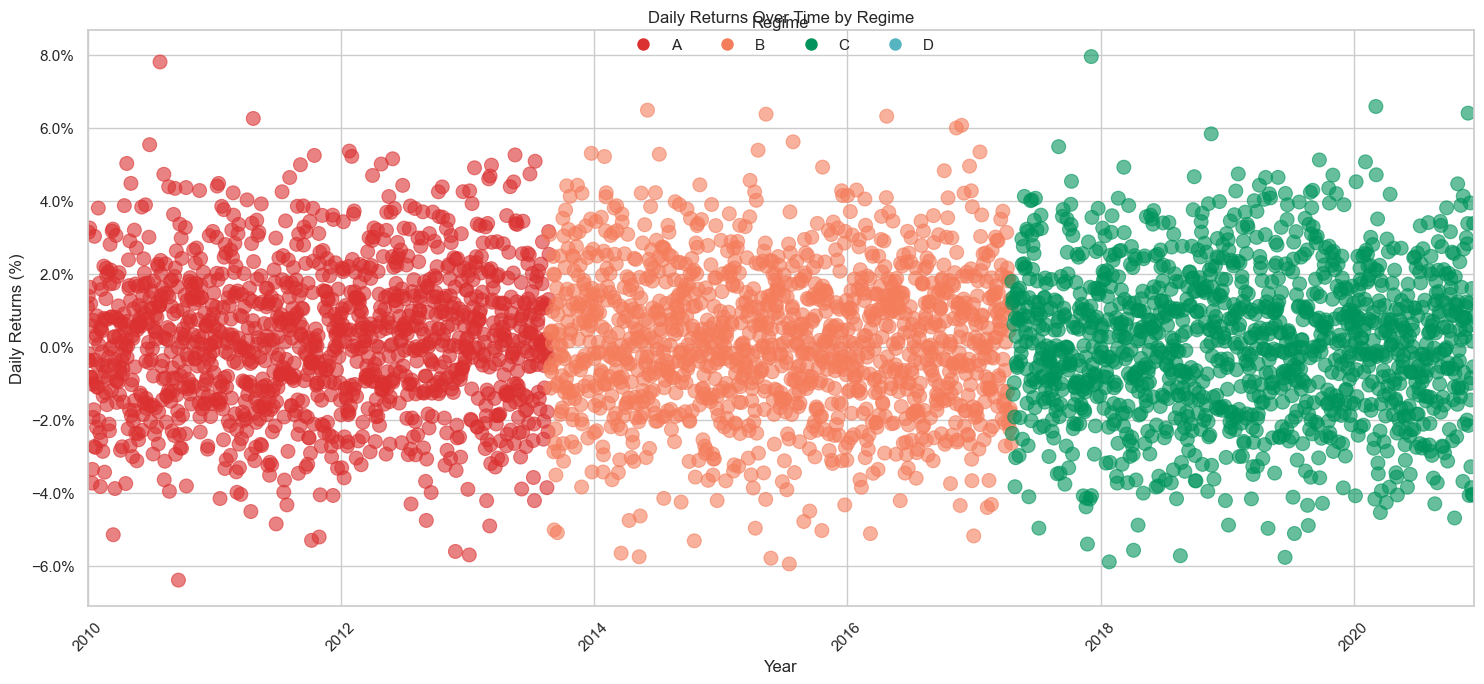


Returns Series for Regime B:
timestamp
2013-08-26    0.030815
2013-08-27    0.003973
2013-08-28   -0.005742
2013-08-29   -0.011268
2013-08-30   -0.005049
Name: returns, dtype: float64


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter
from matplotlib.lines import Line2D

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter
from matplotlib.lines import Line2D
import numpy as np

def plot_returns_seaborn(df, time_col='timestamp', return_col='returns', regime_col='regime',
                        regime_colors=None, figsize=(15, 7), alpha=0.6, s=100,
                        year_interval=5):
    """
    Plots daily returns over time using Seaborn, colored by regime.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the data.
    - time_col (str): Column name for timestamps.
    - return_col (str): Column name for returns.
    - regime_col (str): Column name for regimes.
    - regime_colors (dict): Dictionary mapping regimes to colors.
                            Example: {'A': '#FF5733', 'B': '#33FF57', 'C': '#3357FF'}
    - figsize (tuple): Figure size.
    - alpha (float): Transparency level of scatter points.
    - s (int): Size of scatter points.
    - year_interval (int): Interval in years for major x-axis ticks.

    Returns:
    - None: Displays the plot.
    """
    # Reset index to have 'timestamp' as a column if it's the index
    if df.index.name == time_col:
        df_plot = df.reset_index()
    else:
        df_plot = df.copy()
    
    # Validate required columns after resetting index
    required_columns = {time_col, return_col, regime_col}
    if not required_columns.issubset(df_plot.columns):
        missing = required_columns - set(df_plot.columns)
        raise ValueError(f"DataFrame is missing required columns: {missing}")
    
    if regime_colors is None:
        # Default color mapping using the updated colormap access method
        unique_regimes = df_plot[regime_col].unique()
        cmap = plt.colormaps['tab10']
        colors = cmap(np.linspace(0, 1, len(unique_regimes)))
        regime_colors = {regime: colors[i] for i, regime in enumerate(unique_regimes)}
    
    # Convert returns to percentage
    df_plot[return_col] = df_plot[return_col] * 100
    
    # Set the plot style
    sns.set(style="whitegrid")
    
    # Create the scatter plot
    plt.figure(figsize=figsize)
    scatter = sns.scatterplot(data=df_plot, x=time_col, y=return_col, hue=regime_col,
                              palette=regime_colors, s=s, alpha=alpha, edgecolor=None)
    
    # Formatting the y-axis as percentages
    scatter.yaxis.set_major_formatter(PercentFormatter())
    
    # Labels and title
    plt.xlabel('Year')
    plt.ylabel('Daily Returns (%)')
    plt.title('Daily Returns Over Time by Regime')
    
    # Date formatting on x-axis to show years with specified interval
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator(base=year_interval))  # Major ticks every 'year_interval' years
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    # Optionally, set minor ticks for months
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    
    # Rotate x-ticks for better readability
    plt.xticks(rotation=45)
    
    # Custom legend positioned below the title
    legend_elements = [Line2D([0], [0], marker='o', color='w', label=regime,
                              markerfacecolor=color, markersize=10) 
                       for regime, color in regime_colors.items()]
    
    plt.legend(handles=legend_elements, title='Regime', loc='upper center', 
               bbox_to_anchor=(0.5, 1.05), ncol=len(regime_colors), frameon=False)
    
    # **Set X-Axis Limits to Data Range**
    min_date = df_plot[time_col].min()
    max_date = df_plot[time_col].max()
    ax.set_xlim(min_date, max_date)
    
    # **Adjust Plot Margins (Optional)**
    plt.margins(x=0)  # Remove any additional margins on x-axis
    
    plt.tight_layout()
    plt.show()

def extract_regime_series(df, return_col='returns', regime_col='regime'):
    """
    Extracts subseries of returns for each regime.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the data.
    - return_col (str): Column name for returns.
    - regime_col (str): Column name for regimes.

    Returns:
    - dict: Dictionary with regimes as keys and corresponding return series as values.
    """
    if regime_col not in df.columns or return_col not in df.columns:
        raise ValueError(f"DataFrame must contain '{regime_col}' and '{return_col}' columns.")
    
    # Group by regime and extract return series
    regime_series = {regime: group[return_col] for regime, group in df.groupby(regime_col)}
    
    return regime_series

if __name__ == "__main__":
    # Sample DataFrame creation spanning multiple years
    np.random.seed(42)
    date_range = pd.date_range(start='2010-01-01', periods=4000, freq='D')  # Approximately 10.95 years
    returns = np.random.normal(loc=0.001, scale=0.02, size=len(date_range))  # Mean 0.1%, SD 2%
    regimes = ['A'] * 1333 + ['B'] * 1333 + ['C'] * 1334  # Approximately equal durations
    
    df = pd.DataFrame({
        'timestamp': date_range,
        'returns': returns,
        'regime': regimes
    })
    
    # Define a custom RGB color dictionary for regimes
    regime_colors = {
        'A': '#FF5733',  # Vibrant Orange
        'B': '#33FF57',  # Bright Green
        'C': '#3357FF'   # Strong Blue
    }
    
    # Alternatively, using normalized RGB tuples
    # regime_colors = {
    #     'A': (1.0, 0.341, 0.2),   # Vibrant Orange
    #     'B': (0.2, 1.0, 0.341),   # Bright Green
    #     'C': (0.2, 0.341, 1.0)    # Strong Blue
    # }
    regime_colors = {
    'A':  (215/250, 48/250, 48/250),  # pure red
    'B':   (239/250, 123/250, 90/250),  # orange-ish
    'C':   (0/250, 145/250, 90/250),  # darker green
    'D':  (86/255, 180/255, 192/255),  # pure blue
}
    
    # Set 'timestamp' as the index and ensure index name is 'timestamp'
    df.set_index('timestamp', inplace=True)
    df.index.name = 'timestamp'  # Ensure the index name is correctly set
    
    # Optional: Verify the index name
    print("Index Name:", df.index.name)
    
    # Plot using the updated Seaborn function with yearly ticks every 2 years
    plot_returns_seaborn(df, regime_colors=regime_colors, year_interval=2)
    
    # Extracting regime-wise return series
    regime_returns = extract_regime_series(df, return_col='returns', regime_col='regime')
    
    # Accessing and displaying the returns series for Regime B
    print("\nReturns Series for Regime B:")
    print(regime_returns['B'].head())


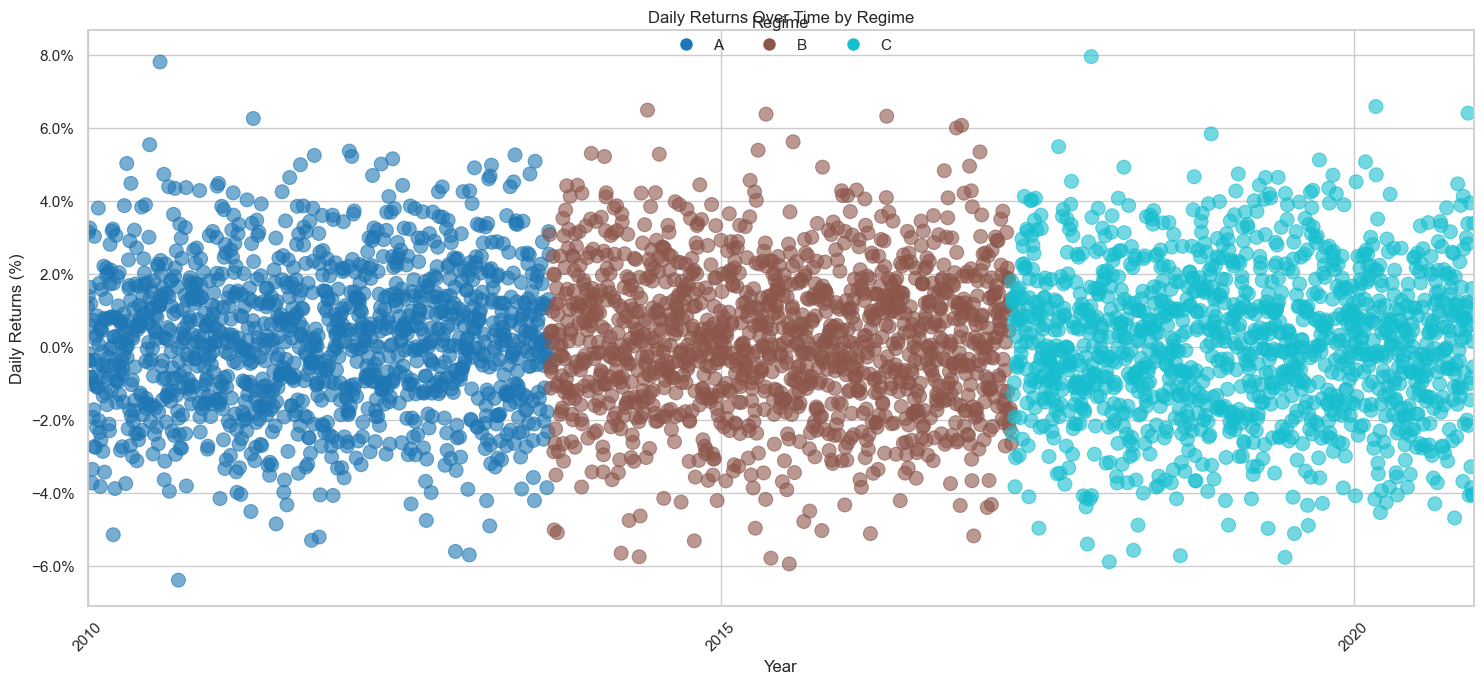

In [48]:
if __name__ == "__main__":
    # Plot using the Seaborn function
    plot_returns_seaborn(df)


In [56]:
def plot_returns_distribution(df, plot_type='box', time_col='timestamp', return_col='returns',
                             regime_col='regime', regime_colors=None, figsize=(12, 8),
                             alpha=0.6, width=0.6, year_interval=5, legend_position='below',
                             title='Distribution of Daily Returns by Regime',
                             xlabel='Year', ylabel='Daily Returns (%)'):
    """
    Plots the distribution of daily returns across different regimes using either a Box Plot or a Violin Plot.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing the data.
    - plot_type (str): Type of plot to generate ('box' or 'violin'). Default is 'box'.
    - time_col (str): Column name for timestamps. Default is 'timestamp'.
    - return_col (str): Column name for returns. Default is 'returns'.
    - regime_col (str): Column name for regimes. Default is 'regime'.
    - regime_colors (dict): Dictionary mapping regimes to colors.
                            Example: {'A': '#FF5733', 'B': '#33FF57', 'C': '#3357FF'}
    - figsize (tuple): Figure size. Default is (12, 8).
    - alpha (float): Transparency level of plot elements. Default is 0.6.
    - width (float): Width of the plot elements. Relevant for box plots. Default is 0.6.
    - year_interval (int): Interval in years for major x-axis ticks. Default is 5.
    - legend_position (str): Position of the legend ('below', 'right', 'upper center', etc.). Default is 'below'.
    - title (str): Title of the plot. Default is 'Distribution of Daily Returns by Regime'.
    - xlabel (str): Label for the x-axis. Default is 'Year'.
    - ylabel (str): Label for the y-axis. Default is 'Daily Returns (%)'.
    
    Returns:
    - None: Displays the plot.
    """
    
    # Validate plot_type
    if plot_type not in ['box', 'violin']:
        raise ValueError("plot_type must be either 'box' or 'violin'")
    
    # Reset index to have 'timestamp' as a column if it's the index
    if df.index.name == time_col:
        df_plot = df.reset_index()
    else:
        df_plot = df.copy()
    
    # Validate required columns
    required_columns = {time_col, return_col, regime_col}
    if not required_columns.issubset(df_plot.columns):
        missing = required_columns - set(df_plot.columns)
        raise ValueError(f"DataFrame is missing required columns: {missing}")
    
    # Define default colors if not provided
    if regime_colors is None:
        unique_regimes = df_plot[regime_col].unique()
        cmap = plt.colormaps['tab10']
        colors = cmap(np.linspace(0, 1, len(unique_regimes)))
        regime_colors = {regime: colors[i] for i, regime in enumerate(unique_regimes)}
    
    # Convert returns to percentage if not already
    if df_plot[return_col].max() <= 1 and df_plot[return_col].min() >= -1:
        df_plot[return_col] = df_plot[return_col] * 100
    
    # Set the plot style
    sns.set(style="whitegrid")
    
    # Initialize the matplotlib figure
    plt.figure(figsize=figsize)
    
    # Create the plot based on plot_type
    if plot_type == 'box':
        sns.boxplot(x=regime_col, y=return_col, data=df_plot, palette=regime_colors, 
                    linewidth=1.5, width=width, fliersize=2, saturation=alpha)
        
    elif plot_type == 'violin':
        sns.violinplot(x=regime_col, y=return_col, data=df_plot, palette=regime_colors, 
                       linewidth=1.5, width=width, inner='quartile', saturation=alpha)
    
    # Set title
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    
    # Add custom axis labels above the title
    ax = plt.gca()
    plt.text(0.5, 1.08, xlabel, ha='center', va='bottom', transform=ax.transAxes, fontsize=14, fontweight='bold')
    plt.text(-0.08, 0.5, ylabel, ha='center', va='center', rotation='vertical', transform=ax.transAxes, fontsize=14, fontweight='bold')
    
    # Customize x-axis ticks
    plt.xticks(fontsize=12)
    
    # Customize y-axis ticks
    plt.yticks(fontsize=12)
    
    # Customize y-axis formatter if needed
    ax.yaxis.set_major_formatter(PercentFormatter())
    
    # Create custom legend
    legend_elements = [Line2D([0], [0], marker='s', color='w', label=regime,
                              markerfacecolor=color, markersize=10) 
                       for regime, color in regime_colors.items()]
    
    # Position the legend
    if legend_position == 'below':
        plt.legend(handles=legend_elements, title='Regime', loc='upper center', 
                   bbox_to_anchor=(0.5, -0.15), ncol=len(regime_colors), frameon=False, fontsize=12)
    else:
        plt.legend(handles=legend_elements, title='Regime', loc=legend_position, 
                   frameon=False, fontsize=12)
    
    # Adjust plot margins to accommodate the legend
    plt.tight_layout()
    
    # Show plot
    plt.show()


/var/folders/y0/5dv_k1x105l2r3xvbg3mwj3h0000gn/T/ipykernel_44268/1232687453.py:65: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




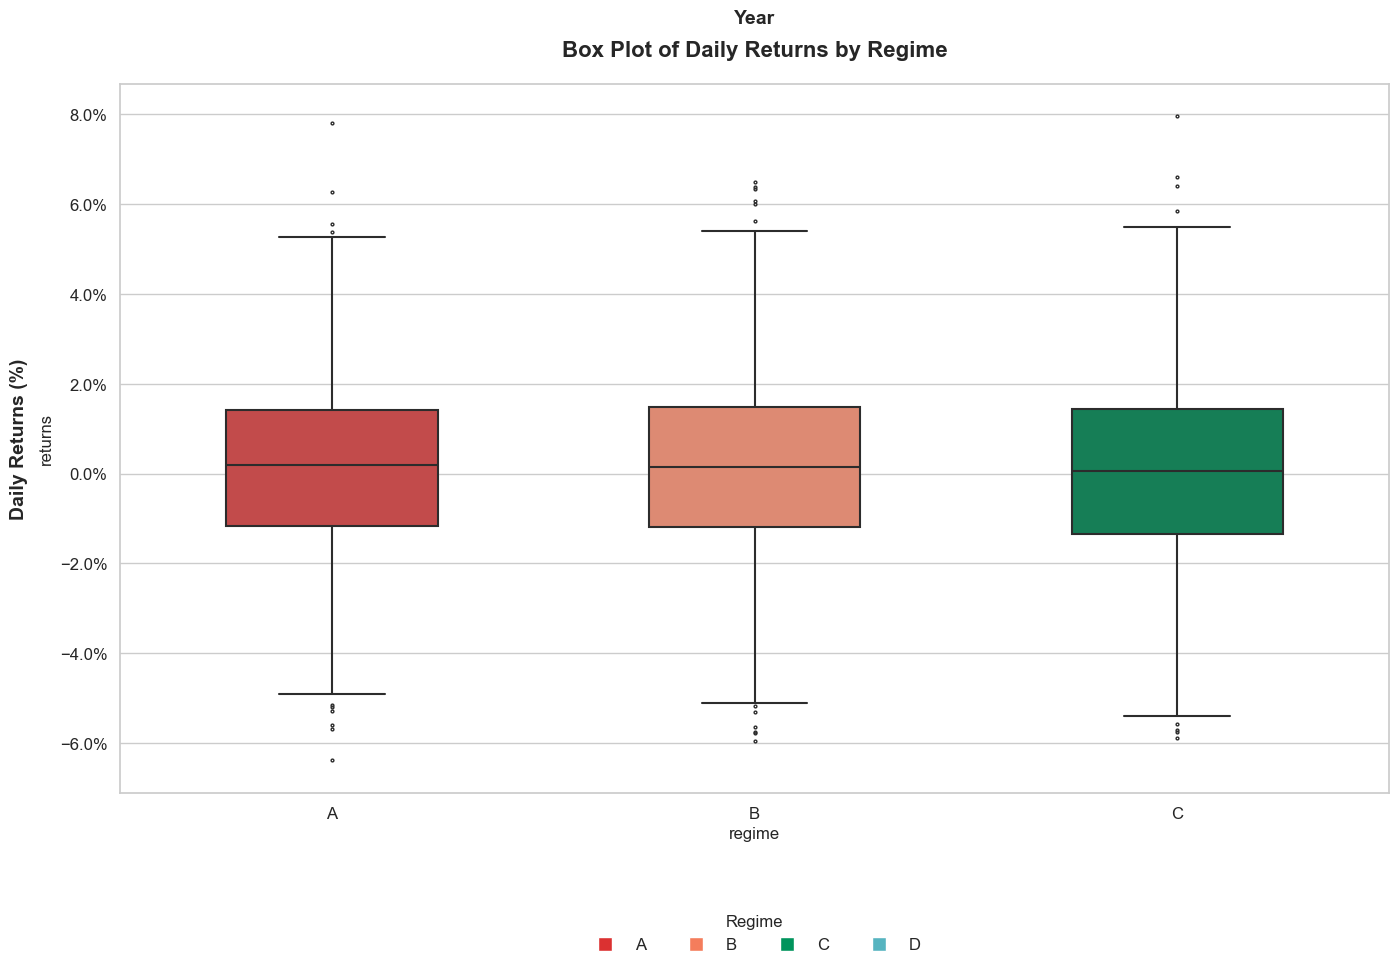

In [57]:
    # Generate a Box Plot
    plot_returns_distribution(
        df,
        plot_type='box',
        regime_colors=regime_colors,
        figsize=(14, 10),
        alpha=0.7,
        width=0.5,
        year_interval=2,
        legend_position='below',
        title='Box Plot of Daily Returns by Regime',
        xlabel='Year',
        ylabel='Daily Returns (%)'
    )


/var/folders/y0/5dv_k1x105l2r3xvbg3mwj3h0000gn/T/ipykernel_44268/2699533567.py:68: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




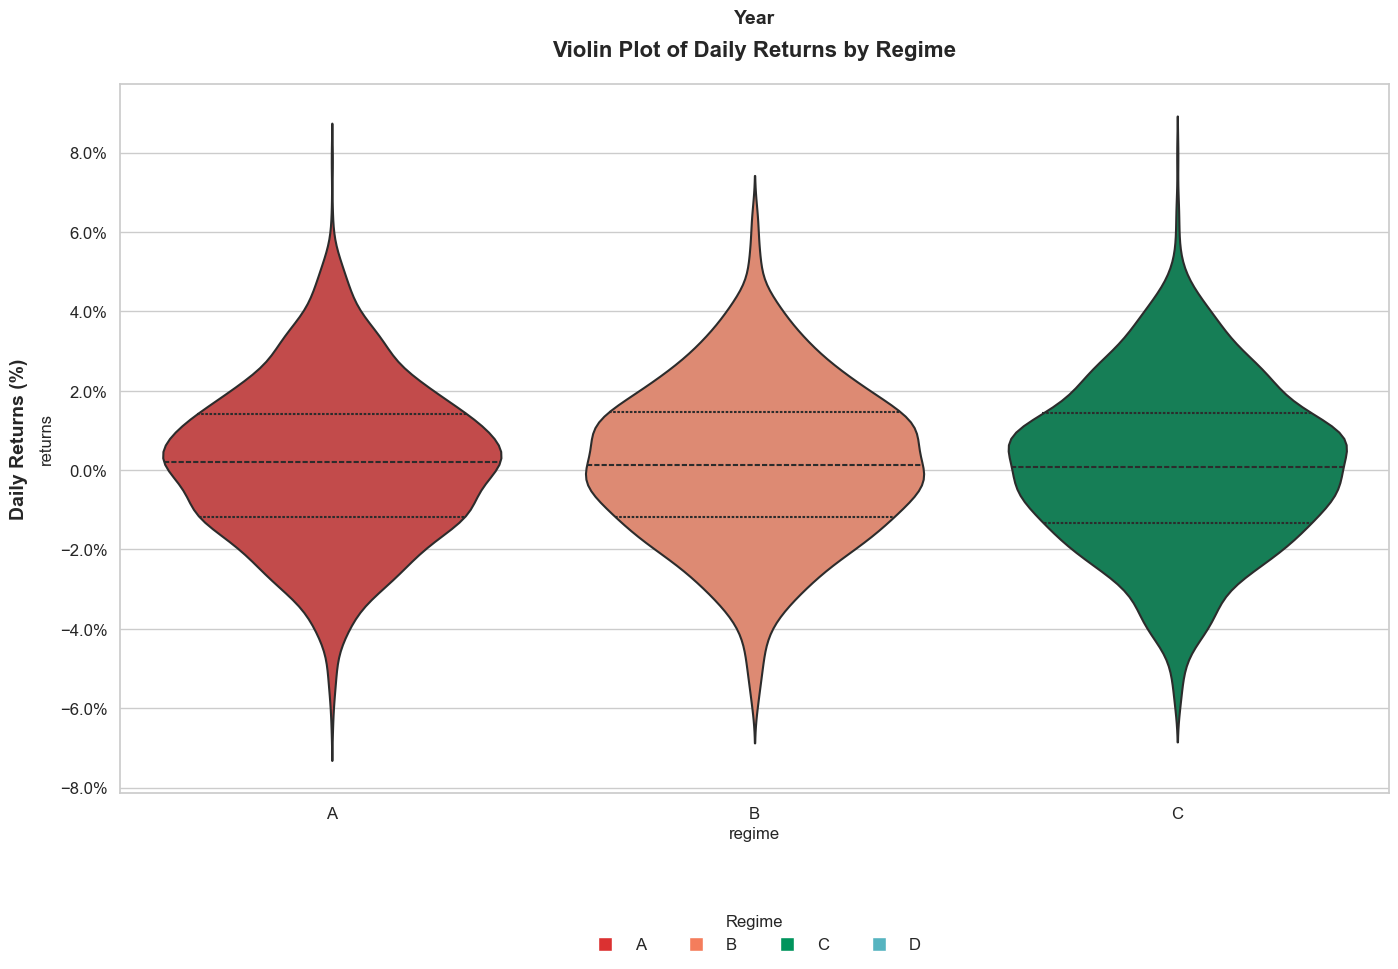

In [51]:
    # Generate a Violin Plot
    plot_returns_distribution(
        df,
        plot_type='violin',
        regime_colors=regime_colors,
        figsize=(14, 10),
        alpha=0.7,
        width=0.8,
        year_interval=2,
        legend_position='below',
        title='Violin Plot of Daily Returns by Regime',
        xlabel='Year',
        ylabel='Daily Returns (%)'
    )


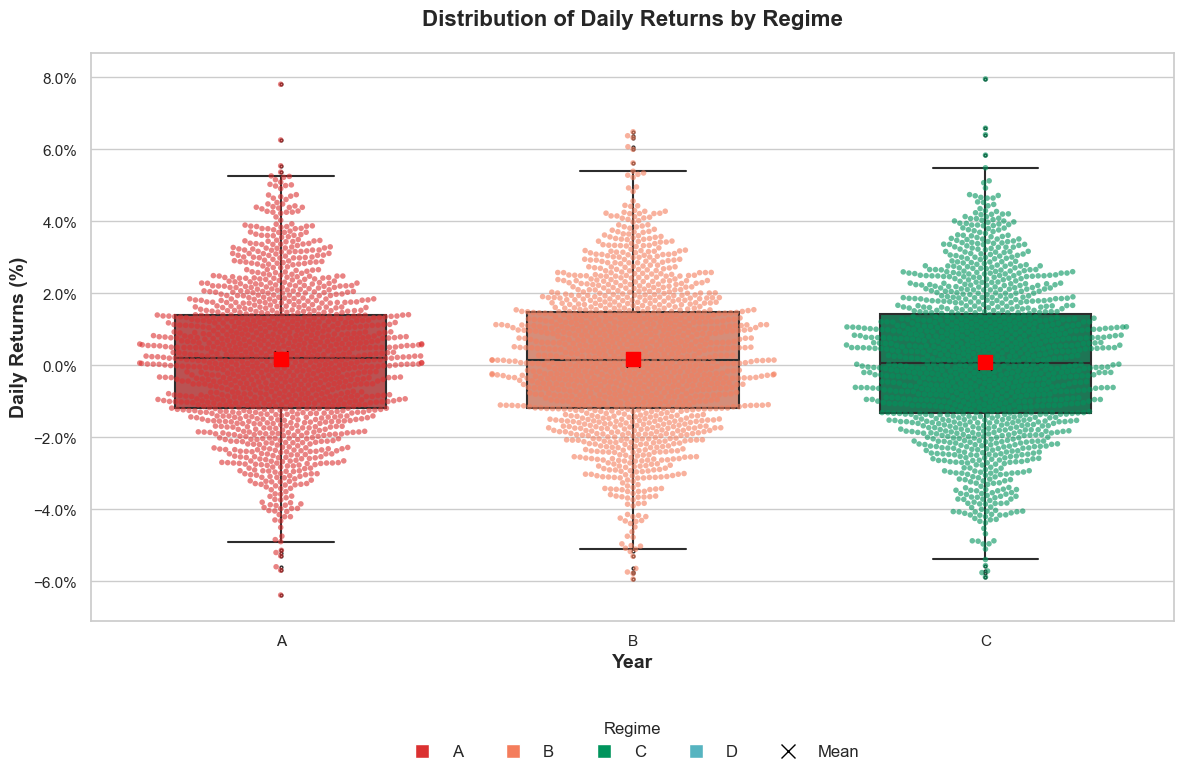

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import PercentFormatter

def plot_returns_distribution_with_swarm(df, plot_type='box', time_col='timestamp', return_col='returns',
                                        regime_col='regime', regime_colors=None, figsize=(12, 8),
                                        alpha=0.6, width=0.6, year_interval=5, legend_position='below',
                                        title='Distribution of Daily Returns by Regime',
                                        xlabel='Regime', ylabel='Daily Returns (%)',
                                        show_swarm=True, swarm_size=4, swarm_alpha=0.6):
    """
    Plots the distribution of daily returns across different regimes using either a Box Plot or a Violin Plot,
    with an optional Swarm Plot overlay. Additionally, overlays median and average markers.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing the data.
    - plot_type (str): Type of plot to generate ('box' or 'violin'). Default is 'box'.
    - time_col (str): Column name for timestamps. Default is 'timestamp'.
    - return_col (str): Column name for returns. Default is 'returns'.
    - regime_col (str): Column name for regimes. Default is 'regime'.
    - regime_colors (dict): Dictionary mapping regimes to colors.
                            Example: {'A': '#FF5733', 'B': '#33FF57', 'C': '#3357FF'}
    - figsize (tuple): Figure size. Default is (12, 8).
    - alpha (float): Saturation level for the primary plot elements. Default is 0.6.
    - width (float): Width of the plot elements. Relevant for box plots. Default is 0.6.
    - year_interval (int): Interval in years for major x-axis ticks. Default is 5.
    - legend_position (str): Position of the legend ('below', 'right', 'upper center', etc.). Default is 'below'.
    - title (str): Title of the plot. Default is 'Distribution of Daily Returns by Regime'.
    - xlabel (str): Label for the x-axis. Default is 'Regime'.
    - ylabel (str): Label for the y-axis. Default is 'Daily Returns (%)'.
    - show_swarm (bool): Whether to overlay a Swarm Plot. Default is True.
    - swarm_size (int): Size of the markers in the Swarm Plot. Default is 4.
    - swarm_alpha (float): Transparency level of the Swarm Plot markers. Default is 0.6.
    
    Returns:
    - None: Displays the plot.
    """
    
    # Validate plot_type
    if plot_type not in ['box', 'violin']:
        raise ValueError("plot_type must be either 'box' or 'violin'")
    
    # Reset index to have 'timestamp' as a column if it's the index
    if df.index.name == time_col:
        df_plot = df.reset_index()
    else:
        df_plot = df.copy()
    
    # Validate required columns
    required_columns = {time_col, return_col, regime_col}
    if not required_columns.issubset(df_plot.columns):
        missing = required_columns - set(df_plot.columns)
        raise ValueError(f"DataFrame is missing required columns: {missing}")
    
    # Define default colors if not provided
    if regime_colors is None:
        unique_regimes = df_plot[regime_col].unique()
        # Choose a palette that does not include 'gray', e.g., 'Set2'
        cmap = sns.color_palette('Set2', n_colors=len(unique_regimes))
        regime_colors = {regime: cmap[i] for i, regime in enumerate(unique_regimes)}
    
    # Convert returns to percentage if not already
    # Assuming returns are in decimal form (e.g., 0.02 for 2%)
    # Check if the max and min are within -100 to 100
    if df_plot[return_col].max() <= 1 and df_plot[return_col].min() >= -1:
        df_plot[return_col] = df_plot[return_col] * 100
    
    # Set the plot style
    sns.set(style="whitegrid")
    
    # Initialize the matplotlib figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create the plot based on plot_type with hue=regime_col
    if plot_type == 'box':
        sns.boxplot(x=regime_col, y=return_col, data=df_plot, palette=regime_colors, 
                    linewidth=1.5, width=width, fliersize=2, saturation=alpha, hue=regime_col, ax=ax, legend=False, zorder=1)
    elif plot_type == 'violin':
        sns.violinplot(x=regime_col, y=return_col, data=df_plot, palette=regime_colors, 
                       linewidth=1.5, width=width, inner='quartile', saturation=alpha, hue=regime_col, ax=ax, legend=False, zorder=1)
    
    # Optionally overlay a Swarm Plot with hue=regime_col
    if show_swarm:
        sns.swarmplot(x=regime_col, y=return_col, data=df_plot, palette=regime_colors, 
                      size=swarm_size, alpha=swarm_alpha, edgecolor='auto', hue=regime_col, dodge=False, legend=False, ax=ax, zorder=2)
    
    # Compute medians and means
    medians = df_plot.groupby(regime_col)[return_col].median()
    means = df_plot.groupby(regime_col)[return_col].mean()
    
    # Plot medians and means after all other plot elements
    for regime in medians.index:
        ax.scatter(regime, medians[regime], marker='x', color='black', s=100, zorder=5, label='Median' if regime == medians.index[0] else "")
        ax.scatter(regime, means[regime], marker='s', color='red', s=100, zorder=5, label='Mean' if regime == means.index[0] else "")
    
    # Create custom legend handles for regimes
    legend_elements = [Line2D([0], [0], marker='s', color='w', label=regime,
                              markerfacecolor=color, markersize=10) 
                       for regime, color in regime_colors.items()]
    
    # Add legend handles for median and mean
    legend_elements += [
      #  Line2D([0], [0], marker='x', color='black', label='Median', linestyle='None', markersize=10),
        Line2D([0], [0], marker='x', color='black', label='Mean', linestyle='None', markersize=10)
    ]
    
    # Position the legend
    if legend_position == 'below':
        ax.legend(handles=legend_elements, title='Regime', loc='upper center', 
                  bbox_to_anchor=(0.5, -0.15), ncol=len(regime_colors) + 2, frameon=False, fontsize=12)
    else:
        ax.legend(handles=legend_elements, title='Regime', loc=legend_position, 
                  frameon=False, fontsize=12)
    
    # Customize y-axis ticks to show percentages
    ax.yaxis.set_major_formatter(PercentFormatter())
    
    # Set title
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    
    # Add custom axis labels (overriding seaborn's default)
    ax.set_xlabel(xlabel, fontsize=14, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold')
    
    # **Remove X-Axis Limits Setting**
    # Since the x-axis is categorical, setting limits based on timestamp is inappropriate
    # Hence, these lines are removed:
    # min_date = df_plot[time_col].min()
    # max_date = df_plot[time_col].max()
    # ax.set_xlim(min_date, max_date)
    
    # **Adjust Plot Margins (Optional)**
    plt.tight_layout()
    plt.show()


plot_returns_distribution_with_swarm(df, plot_type='box', time_col='timestamp', return_col='returns',
                                        regime_col='regime', regime_colors=regime_colors, figsize=(12, 8),
                                        alpha=0.6, width=0.6, year_interval=5, legend_position='below',
                                        title='Distribution of Daily Returns by Regime',
                                        xlabel='Year', ylabel='Daily Returns (%)',
                                        show_swarm=True, swarm_size=4, swarm_alpha=0.6)

In [87]:
import pandas as pd
from scipy.stats import skew, kurtosis

def calculate_regime_statistics(merged_df, performance_label):
    """
    Calculate mean, median, min, max, skewness, and kurtosis for each regime.

    Parameters:
    - merged_df (pd.DataFrame): DataFrame containing 'regime' and performance_label columns.
    - performance_label (str): The column for which to calculate the statistics.

    Returns:
    - pd.DataFrame: A DataFrame with statistics for each regime.
    """
    if 'regime' not in merged_df.columns:
        raise ValueError("'regime' column not found in DataFrame.")

    if performance_label not in merged_df.columns:
        raise ValueError(f"'{performance_label}' column not found in DataFrame.")

    # Initialize an empty list to store statistics for each regime
    statistics = []

    # Loop through each unique regime
    for regime in merged_df['regime'].unique():
        subset = merged_df[merged_df['regime'] == regime][performance_label].dropna()

        # Calculate statistics
        regime_stats = {
            'Regime': regime,
            'Mean': subset.mean(),
            'Median': subset.median(),
            'Min': subset.min(),
            'Max': subset.max(),
            'Skewness': skew(subset),
            'Kurtosis': kurtosis(subset)
        }
        statistics.append(regime_stats)

    # Convert the list of dictionaries to a DataFrame
    stats_df = pd.DataFrame(statistics)

    print("Regime Statistics:")

    return stats_df

def calculate_regime_statistics(merged_df, performance_label="spot_return"):
    """
    Calculate summary statistics and frequency percentage for each regime.

    Parameters:
    - merged_df (pd.DataFrame): DataFrame containing 'regime' and performance metrics.
    - performance_label (str): The column name of the performance metric.

    Returns:
    - pd.DataFrame: DataFrame with frequency percentage as the first column and other summary statistics.
    """
    if performance_label not in merged_df.columns:
        raise ValueError(f"'{performance_label}' column not found in DataFrame. Available columns: {merged_df.columns.tolist()}")

    # Calculate statistics for each regime
    regime_stats = merged_df.groupby('regime')[performance_label].agg(
        mean='mean',
        median='median',
        min='min',
        max='max',
        skewness=lambda x: x.skew(),
        kurtosis=lambda x: x.kurt()
    )

    # Calculate frequency percentage
    regime_counts = merged_df['regime'].value_counts(normalize=True) * 100
    regime_counts = regime_counts.round(1)  # Round to 1 decimal place

    # Add frequency percentage to the statistics DataFrame
    regime_stats['frequency (%)'] = regime_stats.index.map(regime_counts)

    # Reorder columns to have frequency (%) as the first column
    columns = ['frequency (%)', 'mean', 'median', 'min', 'max', 'skewness', 'kurtosis']
    regime_stats = regime_stats[columns]

    # Format all numerical columns to one decimal place
    regime_stats = regime_stats.round(1)

    # Set regime as the index
    regime_stats.index.name = 'Regime'

    return regime_stats




# Example usage
# Assuming `merged_df` is already defined and has 'regime' and 'spot_return' columns
regime_stats_df = calculate_regime_statistics(df, performance_label='returns')
regime_stats_df

,frequency (%),mean,median,min,max,skewness,kurtosis
Regime,,,,,,,
A,33.3,0.0,0.0,-0.1,0.1,0.1,0.0
B,33.3,0.0,0.0,-0.1,0.1,-0.0,0.1
C,33.4,0.0,0.0,-0.1,0.1,0.0,-0.1


In [81]:
df

,returns,regime
timestamp,,
2010-01-01,0.010934,A
2010-01-02,-0.001765,A
2010-01-03,0.013954,A
2010-01-04,0.031461,A
2010-01-05,-0.003683,A
...,...,...
2020-12-09,0.001569,C
2020-12-10,-0.040556,C
2020-12-11,-0.005406,C


In [89]:
def calculate_regime_frequencies(merged_df):
    """
    Calculate the frequency percentage of each regime.

    Parameters:
    - merged_df (pd.DataFrame): DataFrame containing a 'regime' column.

    Returns:
    - pd.DataFrame: DataFrame with regimes as the index and frequency (%) as the only column.
    """
    # Calculate frequency percentage
    regime_counts = merged_df['regime'].value_counts(normalize=True) * 100
    regime_counts = regime_counts.round(1)  # Round to 1 decimal place

    # Create a DataFrame with frequency percentages
    regime_frequency_df = pd.DataFrame({'frequency (%)': regime_counts})

    # Set the index name to 'Regime'
    regime_frequency_df.index.name = 'Regime'

    return regime_frequency_df

calculate_regime_frequencies(df)

,frequency (%)
Regime,
C,33.4
A,33.3
B,33.3


In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np

def plot_regime_colored_series_lc(color_dict, df, value_col='value', regime_col='regime', time_col=None):
    """
    Plots a time series with different colors based on regime changes using LineCollection.

    Parameters:
    - color_dict (dict): Dictionary mapping regime identifiers to colors (RGB tuples or hex strings).
    - df (pd.DataFrame): DataFrame containing the time series and regime information.
    - value_col (str): Name of the column with the time series values.
    - regime_col (str): Name of the column with regime identifiers.
    - time_col (str or None): Name of the column with time information. If None, uses DataFrame index.
    """
    # Validate input DataFrame
    required_cols = [value_col, regime_col]
    if time_col:
        required_cols.append(time_col)
    if not all(col in df.columns for col in required_cols):
        raise ValueError(f"DataFrame must contain columns: {required_cols}")

    # Prepare x and y data
    if time_col:
        x = pd.to_datetime(df[time_col]).values
    else:
        x = np.arange(len(df))
    y = df[value_col].values
    regimes = df[regime_col].values

    # Create segments between consecutive points
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Assign a color to each segment based on the starting regime
    colors = [color_dict.get(regime, '#000000') for regime in regimes[:-1]]

    # Create a LineCollection
    lc = LineCollection(segments, colors=colors, linewidth=2)

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.add_collection(lc)

    # Set plot limits
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())

    # Set labels and title
    ax.set_xlabel(time_col if time_col else 'Index')
    ax.set_ylabel(value_col)
    ax.set_title('Time Series with Regime-Based Coloring')

    # Create custom legend
    legend_elements = [Line2D([0], [0], color=color, lw=2, label=str(regime)) 
                       for regime, color in color_dict.items()]
    ax.legend(handles=legend_elements, title='Regimes')

    plt.tight_layout()
    plt.show()


In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def plot_series_colored(color_dict, df, value_col='value', regime_col='regime', time_col=None):
    """
    Plots a time series with different colors based on regime changes without gaps using grouped plotting.
    
    Parameters:
    - color_dict (dict): Dictionary mapping regime identifiers to colors (RGB tuples or hex strings).
    - df (pd.DataFrame): DataFrame containing the time series and regime information.
    - value_col (str): Name of the column with the time series values.
    - regime_col (str): Name of the column with regime identifiers.
    - time_col (str or None): Name of the column with time information. If None, uses DataFrame index.
    """
    # Validate input DataFrame
    required_cols = [value_col, regime_col]
    if time_col:
        required_cols.append(time_col)
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"DataFrame is missing required columns: {missing_cols}")
    
    # Handle missing values by dropping them
    df_clean = df.dropna(subset=required_cols).copy()
    if df_clean.empty:
        raise ValueError("DataFrame is empty after dropping rows with missing values.")
    
    # Sort the DataFrame by time_col if provided
    if time_col:
        df_clean = df_clean.sort_values(by=time_col)
        x = pd.to_datetime(df_clean[time_col])
    else:
        x = df_clean.index
    
    y = df_clean[value_col].values
    regimes = df_clean[regime_col].values
    
    # Check for regimes missing in color_dict
    unique_regimes = np.unique(regimes)
    missing_regimes = set(unique_regimes) - set(color_dict.keys())
    if missing_regimes:
        print(f"Warning: The following regimes are missing in color_dict and will be plotted in black: {missing_regimes}")
    
    # Assign segment IDs for consecutive regimes
    segment_ids = (regimes != np.roll(regimes, 1)).cumsum()
    df_clean['segment_id'] = segment_ids
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot each segment, ensuring overlapping boundary points
    previous_end = None
    for seg_id, group in df_clean.groupby('segment_id'):
        regime = group[regime_col].iloc[0]
        color = color_dict.get(regime, '#000000')
        
        if previous_end is not None:
            # Prepend the previous end to the current group to overlap
            group = pd.concat([previous_end, group], ignore_index=True)
        
        ax.plot(group[time_col] if time_col else group.index, group[value_col], color=color, linewidth=2)
        previous_end = group.iloc[[-1]]
    
    # Set labels and title
    ax.set_xlabel(time_col if time_col else 'Index')
    ax.set_ylabel(value_col)
    ax.set_title('Time Series with Regime-Based Coloring (Grouped)')
    
    # Create custom legend
    legend_elements = [Line2D([0], [0], color=color, lw=2, label=str(regime)) 
                       for regime, color in color_dict.items()]
    ax.legend(handles=legend_elements, title='Regimes')
    
    plt.tight_layout()
    plt.show()

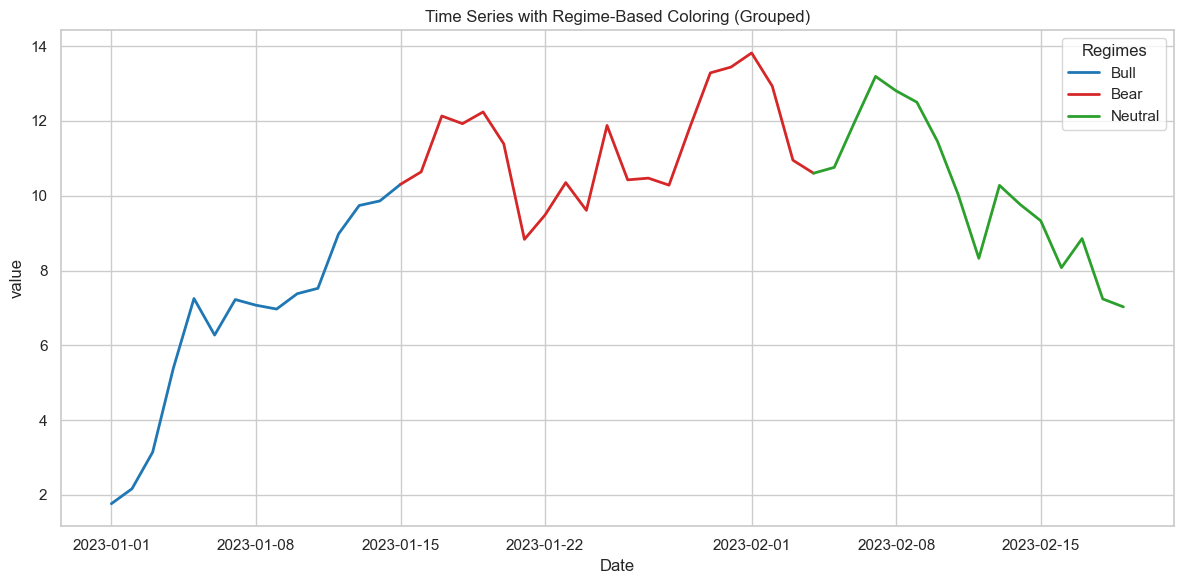

In [120]:
# Plot the time series with regime-based coloring without gaps using grouped plotting
plot_series_colored(
    color_dict=color_dict,
    df=df_sample,
    value_col='value',
    regime_col='regime',
    time_col='Date'
)

In [107]:
df_sample

,Date,value,regime
0,2023-01-01,1.764052,Bull
1,2023-01-02,2.164210,Bull
2,2023-01-03,3.142948,Bull
3,2023-01-04,5.383841,Bull
4,2023-01-05,7.251399,Bull
5,2023-01-06,6.274121,Bull
6,2023-01-07,7.224209,Bull
7,2023-01-08,7.072852,Bull
8,2023-01-09,6.969633,Bull
9,2023-01-10,7.380232,Bull
